# Optimal Number of Nodes for LSTM

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import optimizers
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from keras.models import save_model

from matplotlib.ticker import MaxNLocator

In [2]:
# Reading the dataset
dft1 = pd.read_csv('TripA04.csv')
dft2 = pd.read_csv('TripA06.csv')
dft3 = pd.read_csv('TripA08.csv')
dft4 = pd.read_csv('TripA12.csv')
dft5 = pd.read_csv('TripA16.csv')
dft6 = pd.read_csv('TripA20.csv')
dft7 = pd.read_csv('TripA24.csv')
dft8 = pd.read_csv('TripA28.csv')
dft9 = pd.read_csv('TripA32.csv')

dft10 = pd.read_csv('TripB01.csv')
dft11 = pd.read_csv('TripB03.csv')
dft12 = pd.read_csv('TripB10.csv')
dft13 = pd.read_csv('TripB15.csv')
dft14 = pd.read_csv('TripB20.csv')
dft15 = pd.read_csv('TripB23.csv')
dft16 = pd.read_csv('TripB25.csv')
dft17 = pd.read_csv('TripB27.csv')
dft18 = pd.read_csv('TripB30.csv')
dft19 = pd.read_csv('TripB33.csv')
dft20 = pd.read_csv('TripB38.csv')


dft21 = pd.read_csv('TripA02.csv')
dft22 = pd.read_csv('TripA03.csv')
dft23 = pd.read_csv('TripA07.csv')
dft24 = pd.read_csv('TripA15.csv')
dft25 = pd.read_csv('TripA21.csv')
dft26 = pd.read_csv('TripA25.csv')
dft27 = pd.read_csv('TripA27.csv')

dft28 = pd.read_csv('TripB05.csv')
dft29 = pd.read_csv('TripB07.csv')
dft30 = pd.read_csv('TripB13.csv')
dft31 = pd.read_csv('TripB16.csv')
dft32 = pd.read_csv('TripB22.csv')
dft33 = pd.read_csv('TripB28.csv')
dft34 = pd.read_csv('TripB31.csv')
dft35 = pd.read_csv('TripB37.csv')
df = pd.concat([dft1, dft2, dft3, dft4, dft5, dft6, dft7, dft8, dft9, dft10, dft11, dft12, dft13, dft14, dft15, dft16, dft17, dft18, dft19, 
                dft20, dft21, dft22, dft23, dft24, dft25, dft26, dft27, dft28, dft29, dft30, dft31, dft32, dft33, dft34, dft35], ignore_index=True)
df.shape

(538214, 102)

In [3]:
df.describe()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [C],...,Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C],Battery Temperature [�C]
count,538214.000000,538214.000000,538214.000000,538214.000000,538214.000000,538214.000000,538214.000000,538214.000000,538214.000000,496092.000000,...,18223.000000,18223.000000,18223.000000,18223.000000,18223.000000,18223.000000,18223.000000,18223.000000,18223.000000,23899.000000
mean,927.042681,48.204922,524.400663,30.368202,11.335276,0.003850,0.058006,376.137015,-21.815535,16.707009,...,23.509571,44.573138,44.204625,17.991491,19.900232,33.153629,32.101083,35.385577,31.368940,3.714842
std,671.750161,36.031693,41.051019,17.871018,36.659281,0.664698,0.233630,10.793452,43.691556,7.965289,...,4.190296,7.899812,8.072591,3.958080,3.915668,6.962805,7.177824,8.173045,6.866679,1.633322
min,0.000000,0.000000,449.000000,0.000000,-87.500000,-9.030000,0.000000,301.800000,-402.280000,-1.000000,...,0.490000,-0.740000,-0.650000,3.980000,4.680000,0.310000,0.400000,0.660000,0.920000,1.000000
25%,385.300000,19.989925,484.000000,17.280000,0.000000,-0.240000,0.000000,369.820000,-33.640000,10.000000,...,23.010000,43.310000,42.640000,18.595000,20.390000,33.020000,32.870000,35.090000,31.300000,2.000000
50%,814.800000,44.570000,520.000000,35.130000,7.000000,-0.010000,0.000000,378.930000,-12.670000,18.000000,...,24.020000,44.390000,43.780000,19.500000,21.170000,33.870000,33.880000,36.270000,32.080000,4.000000
75%,1335.300000,71.580000,556.520000,43.780000,23.500000,0.220000,0.000000,384.066905,-2.600000,25.000000,...,25.120000,45.820000,45.405000,19.860000,21.700000,35.220000,35.050000,38.280000,33.730000,5.000000
max,3251.700000,152.000000,664.990000,99.630000,249.500000,4.460000,1.000000,394.660000,143.840000,32.000000,...,29.110000,55.210000,55.910000,21.350000,23.870000,42.900000,39.760000,46.480000,41.070000,6.000000


In [4]:
# Extracting input variables and target variable from the dataset
attr = ['Battery Voltage [V]','Battery Current [A]','Battery Temperature [C]','SoC [%]']
df = df[:].loc[:,attr]

## Data Preprocessing

In [5]:
df.isna().sum()

Battery Voltage [V]            0
Battery Current [A]            0
Battery Temperature [C]    42122
SoC [%]                     5811
dtype: int64

In [6]:
df = df.fillna(method = 'bfill')
df.isna().sum()

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\214754001.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method = 'bfill')


Battery Voltage [V]        0
Battery Current [A]        0
Battery Temperature [C]    0
SoC [%]                    0
dtype: int64

In [7]:
df = df.sort_values(by='SoC [%]', ascending=False)
df

,Battery Voltage [V],Battery Current [A],Battery Temperature [C],SoC [%]
35770,391.57,-8.96,26.0,86.6
35782,390.97,-16.99,26.0,86.6
35792,390.83,-17.85,26.0,86.6
35791,390.82,-17.96,26.0,86.6
35790,390.87,-17.66,26.0,86.6
...,...,...,...,...
510698,339.38,-1.30,11.0,19.6
510696,338.25,-10.61,11.0,19.6
510695,338.10,-11.60,11.0,19.6
510694,338.10,-11.15,11.0,19.6


In [8]:
df.shape

(538214, 4)

In [9]:
df.describe()

,Battery Voltage [V],Battery Current [A],Battery Temperature [C],SoC [%]
count,538214.000000,538214.000000,538214.000000,538214.000000
mean,376.137015,-21.815535,16.226506,65.843678
std,10.793452,43.691556,7.824246,12.931754
min,301.800000,-402.280000,-1.000000,19.600000
25%,369.820000,-33.640000,10.000000,59.400000
50%,378.930000,-12.670000,17.000000,68.100000
75%,384.066905,-2.600000,22.000000,75.300000
max,394.660000,143.840000,32.000000,86.600000


## Splitting the Dataset into Training and Validation Subsets

In [10]:
def train_test_split(df, validation_split=0.2):
  train = df.loc[:,:].values

  validation_size = int(len(train) * validation_split)

  training_set = train[:-validation_size]
  validation_set = train[-validation_size:]

  return training_set, validation_set

training_set, validation_set = train_test_split(df)
print(training_set.shape, validation_set.shape)

(430572, 4) (107642, 4)


In [11]:
print(type(training_set))
print(type(validation_set))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
# Normalizing the dataset
sc = MinMaxScaler(feature_range=(-1, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled.shape)
validation_set_scaled = sc.fit_transform(validation_set)
print(validation_set_scaled.shape)

(430572, 4)
(107642, 4)


## Converting the Training and Validation Subsets into Sequential Timesteps

In [14]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    if end_ix > len(sequence) - 1:
      break
    
    seq_x = sequence[i:end_ix,:]  
    seq_y = sequence[end_ix,-1]  
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)
n_steps = 1
features = training_set_scaled.shape[1]

X_train, y_train = split_sequence(training_set_scaled, n_steps)
print(X_train.shape,y_train.shape)
X_val, y_val = split_sequence(validation_set_scaled, n_steps)
print(X_val.shape,y_val.shape)

(430571, 1, 4) (430571,)
(107641, 1, 4) (107641,)


## LSTM Model

### Defining and Compiling the Model

In [15]:
def create_model(cf):
   model = Sequential()
   if cf == 1:
      model.add(LSTM(units=256, activation="tanh", input_shape=(n_steps, features)))
      model.add(Dense(units=1, activation="linear"))
   elif cf == 2:
      model.add(LSTM(units=128, activation="tanh", input_shape=(n_steps, features)))
      model.add(Dense(units=1, activation="linear"))
   elif cf == 3:
      model.add(LSTM(units=64, activation="tanh", input_shape=(n_steps, features)))
      model.add(Dense(units=1, activation="linear"))
   elif cf == 4:
      model.add(LSTM(units=32, activation="tanh", input_shape=(n_steps, features)))
      model.add(Dense(units=1, activation="linear"))
   
   opt = optimizers.SGD(learning_rate=0.025)
   model.compile(optimizer=opt, loss="mean_squared_error")
   return model

Model 1:
Epoch 1/100


d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


841/841 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1212 - val_loss: 0.0042
Epoch 2/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 6.2412e-04 - val_loss: 8.9440e-04
Epoch 3/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.8874e-04 - val_loss: 4.9834e-04
Epoch 4/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.0054e-04 - val_loss: 3.4554e-04
Epoch 5/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 6.8841e-05 - val_loss: 2.6753e-04
Epoch 6/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 5.4681e-05 - val_loss: 2.2387e-04
Epoch 7/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 4.7606e-05 - val_loss: 1.9178e-04
Epoch 8/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 4.2061e-05 - val_loss: 1.6709e-04
Epoch 9/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 3.7607e-05 - val_loss: 1.4798e-04
Epoch 10/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 3.3867e-05 - val_loss: 1.3018e-04
Epoch 11/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 3.0313e

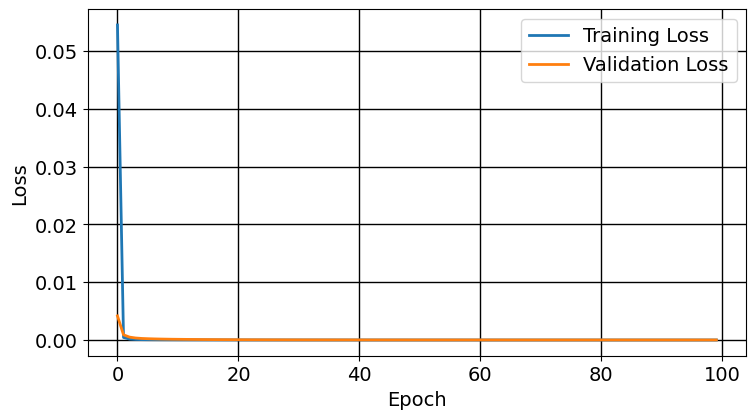

Train MSE: 0.000004
Validation MSE: 0.000009
13456/13456 ━━━━━━━━━━━━━━━━━━━━ 8s 599us/step
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 2s 631us/step


Train R2: 0.999985
Validation R2: 0.999963
Model 2:
Epoch 1/100


d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1146 - val_loss: 0.0032
Epoch 2/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.1433e-04 - val_loss: 6.1338e-04
Epoch 3/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 9.7455e-05 - val_loss: 4.3516e-04
Epoch 4/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.6399e-05 - val_loss: 3.6254e-04
Epoch 5/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.5197e-05 - val_loss: 3.1777e-04
Epoch 6/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.7541e-05 - val_loss: 2.8491e-04
Epoch 7/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.2305e-05 - val_loss: 2.5971e-04
Epoch 8/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.7755e-05 - val_loss: 2.3516e-04
Epoch 9/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.4072e-05 - val_loss: 2.1469e-04
Epoch 10/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.0789e-05 - val_loss: 1.9647e-04
Epoch 11/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.7534e

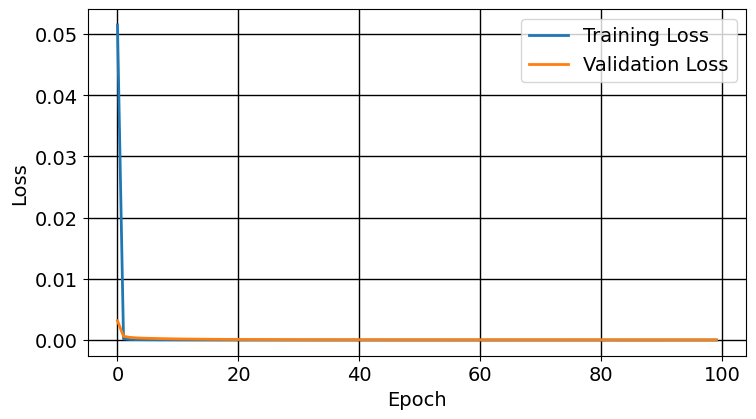

Train MSE: 0.000011
Validation MSE: 0.000025
13456/13456 ━━━━━━━━━━━━━━━━━━━━ 7s 530us/step
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 2s 534us/step


Train R2: 0.999957
Validation R2: 0.999892
Model 3:
Epoch 1/100


d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


841/841 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1130 - val_loss: 0.0027
Epoch 2/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.5377e-04 - val_loss: 7.1119e-04
Epoch 3/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1313e-04 - val_loss: 3.9174e-04
Epoch 4/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2118e-04 - val_loss: 2.7344e-04
Epoch 5/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.9959e-05 - val_loss: 2.2139e-04
Epoch 6/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.7211e-05 - val_loss: 1.9457e-04
Epoch 7/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.0629e-05 - val_loss: 1.7716e-04
Epoch 8/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.6172e-05 - val_loss: 1.6577e-04
Epoch 9/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.2691e-05 - val_loss: 1.5974e-04
Epoch 10/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.9846e-05 - val_loss: 1.5291e-04
Epoch 11/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.7095e

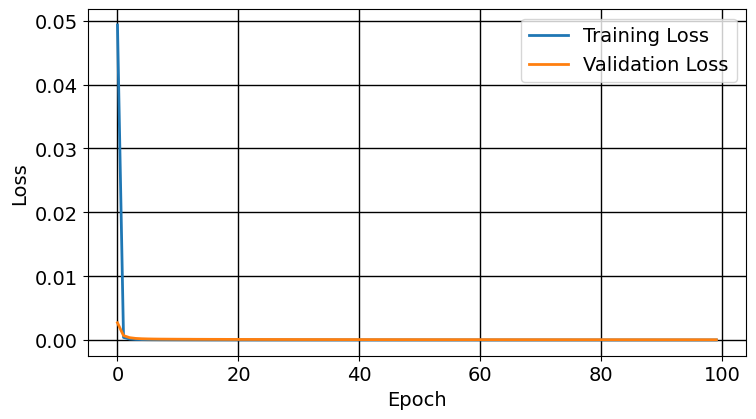

Train MSE: 0.000029
Validation MSE: 0.000064
13456/13456 ━━━━━━━━━━━━━━━━━━━━ 6s 411us/step
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step


Train R2: 0.999885
Validation R2: 0.999729
Model 4:
Epoch 1/100


d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1550 - val_loss: 0.0053
Epoch 2/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - loss: 5.1562e-04 - val_loss: 0.0017
Epoch 3/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - loss: 2.7496e-04 - val_loss: 0.0013
Epoch 4/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - loss: 2.4628e-04 - val_loss: 0.0012
Epoch 5/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step - loss: 2.3085e-04 - val_loss: 0.0011
Epoch 6/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - loss: 2.1857e-04 - val_loss: 0.0010
Epoch 7/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - loss: 2.1060e-04 - val_loss: 9.5708e-04
Epoch 8/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - loss: 2.0015e-04 - val_loss: 9.0558e-04
Epoch 9/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - loss: 1.9216e-04 - val_loss: 8.5616e-04
Epoch 10/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step - loss: 1.8440e-04 - val_loss: 8.0596e-04
Epoch 11/100
841/841 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - loss: 1.7885e

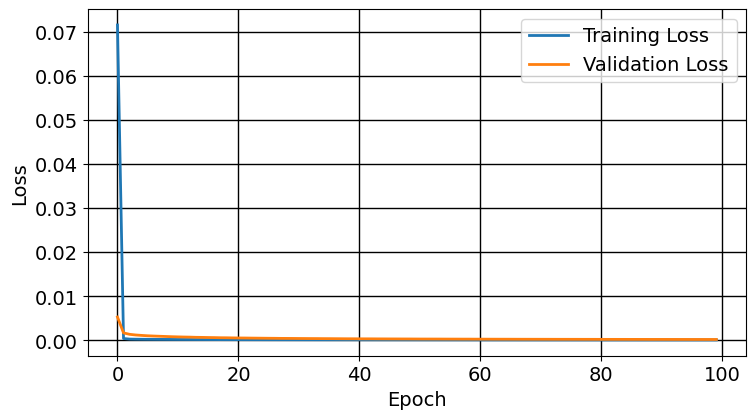

Train MSE: 0.000064
Validation MSE: 0.000177
13456/13456 ━━━━━━━━━━━━━━━━━━━━ 6s 405us/step
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step


Train R2: 0.999741
Validation R2: 0.999246


In [16]:
tr_mse, vl_mse, tr_r2, vl_r2 = [], [], [], []
for n_layers in [1,2,3,4]:
    print(f"Model {n_layers}:")
    model = create_model(n_layers)
    history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=512, 
                    validation_data=(X_val, y_val), 
                    verbose=1)
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(8.5,4.5))
    plt.grid(True,linewidth=1,color='black',alpha=1)
    plt.plot(range(len(train_loss)), train_loss, linewidth=2, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, linewidth=2, label='Validation Loss')
    plt.xlabel('Epoch',color='black',fontsize=14)
    plt.ylabel('Loss',color='black',fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.legend(fontsize=14)
    plt.show()
    
    train_mse = model.evaluate(X_train, y_train, verbose=0)
    train_mse = "{:.6f}".format(train_mse)
    print("Train MSE:",train_mse)
    val_mse = model.evaluate(X_val, y_val, verbose=0)
    val_mse = "{:.6f}".format(val_mse)
    print("Validation MSE:",val_mse)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_val)
    train_r2 = r2_score(y_train[:], train_preds)
    val_r2 = r2_score(y_val[:], test_preds)
    print("Train R2:",round(train_r2,6))
    print("Validation R2:",round(val_r2,6))
    tr_mse.append(train_mse)
    vl_mse.append(val_mse)
    tr_r2.append(train_r2)
    vl_r2.append(val_r2)
    model_filename = f"LSTM_SoC_Final{n_layers}.h5"
    save_model(model, model_filename)

## Performance Metrics

In [17]:
from tabulate import tabulate

tr_mse = [float(el) for el in tr_mse]
vl_mse = [float(el) for el in vl_mse]
tr_r2 = [float(el) for el in tr_r2]
vl_r2 = [float(el) for el in vl_r2]

res = []
model_info = [1,2,3,4]
nodes = [256,128,64,32]

for i in range(len(model_info)):
  el = []
  el.append(model_info[i])
  el.append(nodes[i])
  el.append(tr_mse[i]*100)
  el.append(vl_mse[i]*100)
  el.append(tr_r2[i]*100)
  el.append(vl_r2[i]*100)
  res.append(el)
cols = ["Model","Nodes in Hidden Layer","Train MSE","Validation MSE","Train R2","Validation R2"]

print(tabulate(res, headers=cols, tablefmt="grid", colalign=("center", "center", "center", "center", "center", "center")))

+---------+-------------------------+-------------+------------------+------------+-----------------+
|  Model  |  Nodes in Hidden Layer  |  Train MSE  |  Validation MSE  |  Train R2  |  Validation R2  |
+=========+=========================+=============+==================+============+=================+
|    1    |           256           |   0.0004    |      0.0009      |  99.9985   |     99.9963     |
+---------+-------------------------+-------------+------------------+------------+-----------------+
|    2    |           128           |   0.0011    |      0.0025      |  99.9957   |     99.9892     |
+---------+-------------------------+-------------+------------------+------------+-----------------+
|    3    |           64            |   0.0029    |      0.0064      |  99.9885   |     99.9729     |
+---------+-------------------------+-------------+------------------+------------+-----------------+
|    4    |           32            |   0.0064    |      0.0177      |  99.9741   

After analysing the performance metrics, the optimal number of nodes was found to be **256** as it had the least MSE and highest R2 score.

In [18]:
from keras import models
path = "LSTM_SoC_Final1.h5"
opt_model = models.load_model(path)
opt_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       267,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,523 (1.02 MB)

 Trainable params: 267,521 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Model Testing

In [19]:
def plot_predictions(test, predicted):
    plt.figure(figsize=(8.5,4.5))
    plt.grid(True,linewidth=1,color='black',alpha=1)
    plt.plot(test, color="lime", label="Actual SoC",linewidth=2.75, linestyle='dashed')
    plt.plot(predicted, color="red", label="Predicted SoC",linewidth=2.75, linestyle='dotted')
    plt.ylabel("SoC [%]",color='black',fontsize=14)
    plt.xlabel("Time [s]",color='black',fontsize=14)
    plt.xlim(0,len(test)+100)
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.legend(fontsize=14)
    plt.show()

def return_mse(test, predicted):
    mse = mean_squared_error(test, predicted)
    print("Test MSE: {:.6f}.".format(mse))
def return_r2(test, predicted):
    r2 = r2_score(test, predicted)
    print("Test R2 {:.6f}.".format(r2))

### Test Datasets

 85/574 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\4231373930.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst1 = df_tst1.fillna(method = 'bfill')


574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step


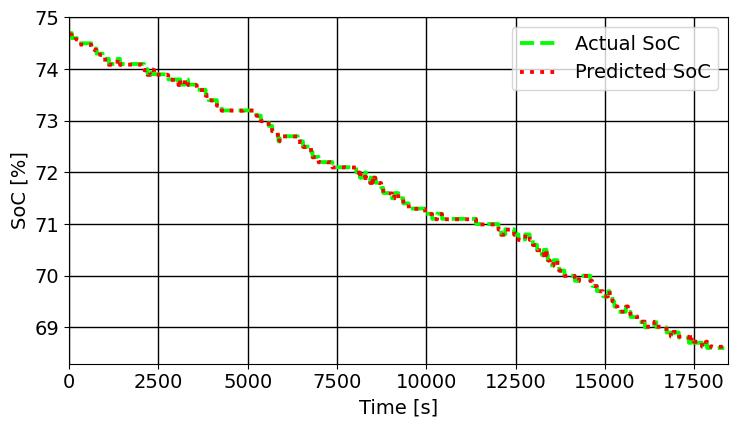

Test MSE: 0.000123.
Test R2 0.999962.


In [20]:
df_tst1 = pd.read_csv('TripA09.csv')
df_tst1 = df_tst1.fillna(method = 'bfill')
df_tst1 = df_tst1[:].loc[:,attr]
actual_soc1 = df_tst1.loc[:,"SoC [%]"].values
act_soc1 = df_tst1.loc[:,"SoC [%]"].values

inputs = df_tst1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mse1))
r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(r2_1))

209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_26216\2488056845.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst2 = df_tst2.fillna(method = 'bfill')


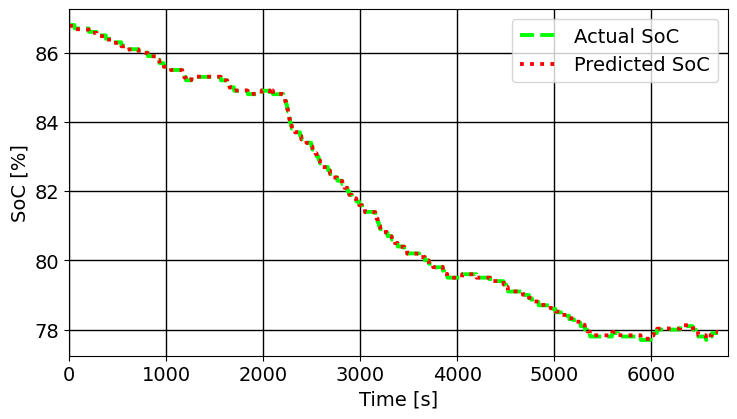

Test MSE: 0.000358.
Test R2 0.999965.


In [21]:
df_tst2 = pd.read_csv('TripA17.csv')
df_tst2 = df_tst2.fillna(method = 'bfill')
df_tst2 = df_tst2[:].loc[:,attr]
actual_soc2 = df_tst2.loc[:,"SoC [%]"].values
act_soc2 = df_tst2.loc[:,"SoC [%]"].values

inputs = df_tst2.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc2.reshape(-1,1))
X_test2, y_test2 = split_sequence(inputs, n_steps)
X_test2 = X_test2.reshape(X_test2.shape[0], X_test2.shape[1], features)

predicted_soc2 = opt_model.predict(X_test2)
predicted_soc2 = sc2.inverse_transform(predicted_soc2)

plot_predictions(actual_soc2,predicted_soc2)
mse2 = mean_squared_error(actual_soc2[0:inputs.shape[0]-1],predicted_soc2)
print("Test MSE: {:.6f}.".format(mse2))
r2_2 = r2_score(actual_soc2[0:inputs.shape[0]-1],predicted_soc2)
print("Test R2 {:.6f}.".format(r2_2))

244/326 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\885310300.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst3 = df_tst3.fillna(method = 'bfill')


326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step


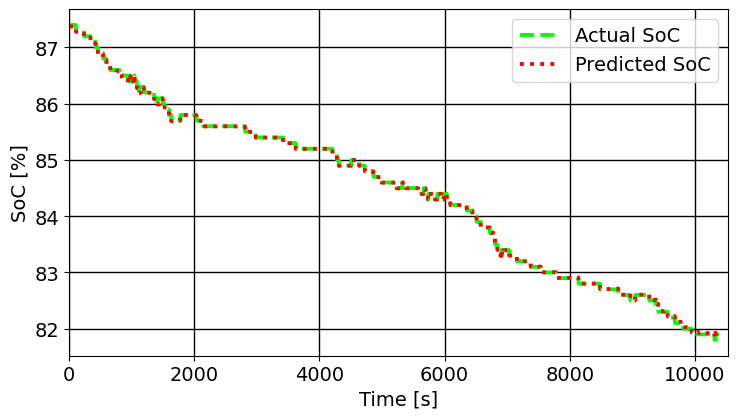

Test MSE: 0.000134.
Test R2 0.999941.


In [22]:
df_tst3 = pd.read_csv('TripA23.csv')
df_tst3 = df_tst3.fillna(method = 'bfill')
df_tst3 = df_tst3[:].loc[:,attr]
actual_soc3 = df_tst3.loc[:,"SoC [%]"].values
act_soc3 = df_tst3.loc[:,"SoC [%]"].values

inputs = df_tst3.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc3.reshape(-1,1))
X_test3, y_test3 = split_sequence(inputs, n_steps)
X_test3 = X_test3.reshape(X_test3.shape[0], X_test3.shape[1], features)

predicted_soc3 = opt_model.predict(X_test3)
predicted_soc3 = sc2.inverse_transform(predicted_soc3)

plot_predictions(actual_soc3,predicted_soc3)
mse3 = mean_squared_error(actual_soc3[0:inputs.shape[0]-1],predicted_soc3)
print("Test MSE: {:.6f}.".format(mse3))
r2_3 = r2_score(actual_soc3[0:inputs.shape[0]-1],predicted_soc3)
print("Test R2 {:.6f}.".format(r2_3))

170/437 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\923861088.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst4 = df_tst4.fillna(method = 'bfill')


437/437 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step


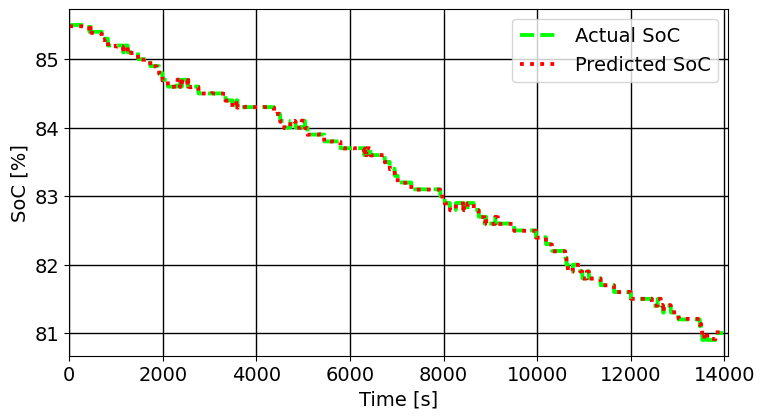

Test MSE: 0.000059.
Test R2 0.999967.


In [23]:
df_tst4 = pd.read_csv('TripA30.csv')
df_tst4 = df_tst4.fillna(method = 'bfill')
df_tst4 = df_tst4[:].loc[:,attr]
actual_soc4 = df_tst4.loc[:,"SoC [%]"].values
act_soc4 = df_tst4.loc[:,"SoC [%]"].values

inputs = df_tst4.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc4.reshape(-1,1))
X_test4, y_test4 = split_sequence(inputs, n_steps)
X_test4 = X_test4.reshape(X_test4.shape[0], X_test4.shape[1], features)

predicted_soc4 = opt_model.predict(X_test4)
predicted_soc4 = sc2.inverse_transform(predicted_soc4)

plot_predictions(actual_soc4,predicted_soc4)
mse4 = mean_squared_error(actual_soc4[0:inputs.shape[0]-1],predicted_soc4)
print("Test MSE: {:.6f}.".format(mse4))
r2_4 = r2_score(actual_soc4[0:inputs.shape[0]-1],predicted_soc4)
print("Test R2 {:.6f}.".format(r2_4))

176/504 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\195861478.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst5 = df_tst5.fillna(method = 'bfill')


504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step


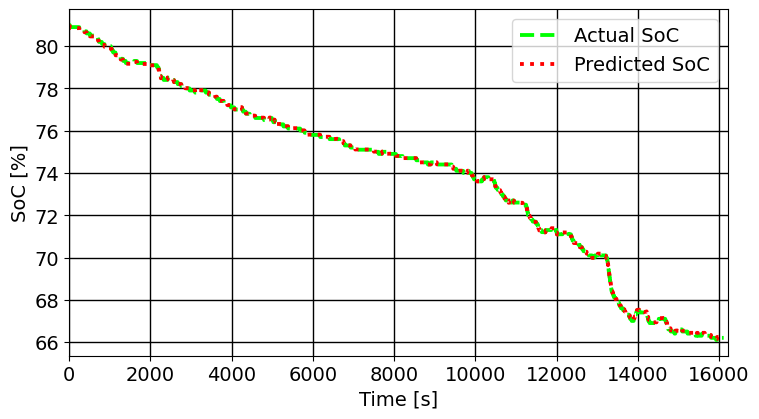

Test MSE: 0.000595.
Test R2 0.999967.


In [24]:
df_tst5 = pd.read_csv('TripB02.csv')
df_tst5 = df_tst5.fillna(method = 'bfill')
df_tst5 = df_tst5[:].loc[:,attr]
actual_soc5 = df_tst5.loc[:,"SoC [%]"].values
act_soc5 = df_tst5.loc[:,"SoC [%]"].values

inputs = df_tst5.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc5.reshape(-1,1))
X_test5, y_test5 = split_sequence(inputs, n_steps)
X_test5 = X_test5.reshape(X_test5.shape[0], X_test5.shape[1], features)

predicted_soc5 = opt_model.predict(X_test5)
predicted_soc5 = sc2.inverse_transform(predicted_soc5)

plot_predictions(actual_soc5,predicted_soc5)
mse5 = mean_squared_error(actual_soc5[0:inputs.shape[0]-1],predicted_soc5)
print("Test MSE: {:.6f}.".format(mse5))
r2_5 = r2_score(actual_soc5[0:inputs.shape[0]-1],predicted_soc5)
print("Test R2 {:.6f}.".format(r2_5))

236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_26216\327712705.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst6 = df_tst6.fillna(method = 'bfill')


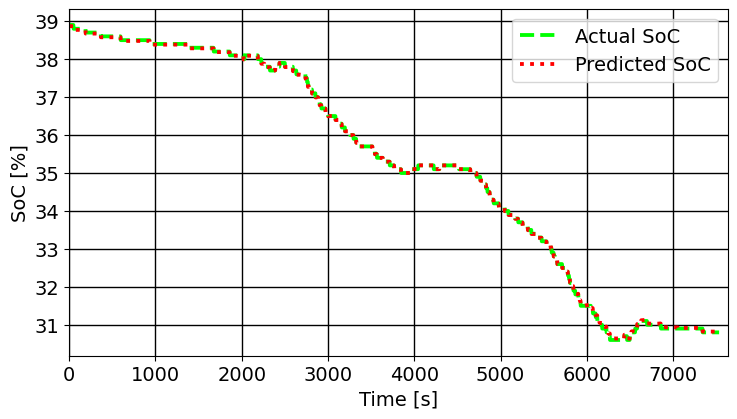

Test MSE: 0.000386.
Test R2 0.999953.


In [25]:
df_tst6 = pd.read_csv('TripB11.csv')
df_tst6 = df_tst6.fillna(method = 'bfill')
df_tst6 = df_tst6[:].loc[:,attr]
actual_soc6 = df_tst6.loc[:,"SoC [%]"].values
act_soc6 = df_tst6.loc[:,"SoC [%]"].values

inputs = df_tst6.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc6.reshape(-1,1))
X_test6, y_test6 = split_sequence(inputs, n_steps)
X_test6 = X_test6.reshape(X_test6.shape[0], X_test6.shape[1], features)

predicted_soc6 = opt_model.predict(X_test6)
predicted_soc6 = sc2.inverse_transform(predicted_soc6)

plot_predictions(actual_soc6,predicted_soc6)
mse6 = mean_squared_error(actual_soc6[0:inputs.shape[0]-1],predicted_soc6)
print("Test MSE: {:.6f}.".format(mse6))
r2_6 = r2_score(actual_soc6[0:inputs.shape[0]-1],predicted_soc6)
print("Test R2 {:.6f}.".format(r2_6))

152/373 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\4284390979.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst7 = df_tst7.fillna(method = 'bfill')


373/373 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step


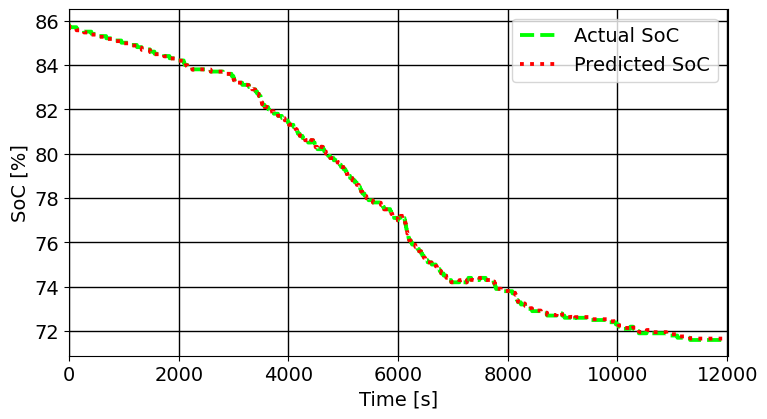

Test MSE: 0.000903.
Test R2 0.999965.


In [26]:
df_tst7 = pd.read_csv('TripB19.csv')
df_tst7 = df_tst7[:].loc[:,attr]
df_tst7 = df_tst7.fillna(method = 'bfill')
actual_soc7 = df_tst7.loc[:,"SoC [%]"].values
act_soc7 = df_tst7.loc[:,"SoC [%]"].values

inputs = df_tst7.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc7.reshape(-1,1))
X_test7, y_test7 = split_sequence(inputs, n_steps)
X_test7 = X_test7.reshape(X_test7.shape[0], X_test7.shape[1], features)

predicted_soc7 = opt_model.predict(X_test7)
predicted_soc7 = sc2.inverse_transform(predicted_soc7)

plot_predictions(actual_soc7,predicted_soc7)
mse7 = mean_squared_error(actual_soc7[0:inputs.shape[0]-1],predicted_soc7)
print("Test MSE: {:.6f}.".format(mse7))
r2_7 = r2_score(actual_soc7[0:inputs.shape[0]-1],predicted_soc7)
print("Test R2 {:.6f}.".format(r2_7))

147/892 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\908716052.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst8 = df_tst8.fillna(method = 'bfill')


892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step


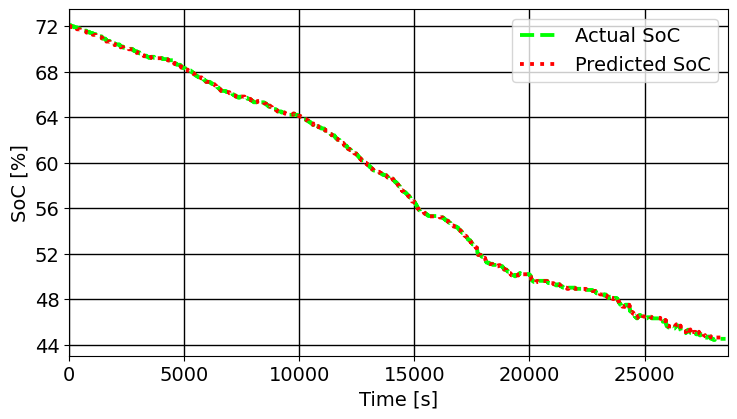

Test MSE: 0.002102.
Test R2 0.999974.


In [27]:
df_tst8 = pd.read_csv('TripB36.csv')
df_tst8 = df_tst8[:].loc[:,attr]
df_tst8 = df_tst8.fillna(method = 'bfill')
actual_soc8 = df_tst8.loc[:,"SoC [%]"].values
act_soc8 = df_tst8.loc[:,"SoC [%]"].values

inputs = df_tst8.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc8.reshape(-1,1))
X_test8, y_test8 = split_sequence(inputs, n_steps)
X_test8 = X_test8.reshape(X_test8.shape[0], X_test8.shape[1], features)

predicted_soc8 = opt_model.predict(X_test8)
predicted_soc8 = sc2.inverse_transform(predicted_soc8)

plot_predictions(actual_soc8,predicted_soc8)
mse8 = mean_squared_error(actual_soc8[0:inputs.shape[0]-1],predicted_soc8)
print("Test MSE: {:.6f}.".format(mse8))
r2_8 = r2_score(actual_soc8[0:inputs.shape[0]-1],predicted_soc8)
print("Test R2 {:.6f}.".format(r2_8))

169/316 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\3412345231.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst9 = df_tst9.fillna(method = 'bfill')


316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


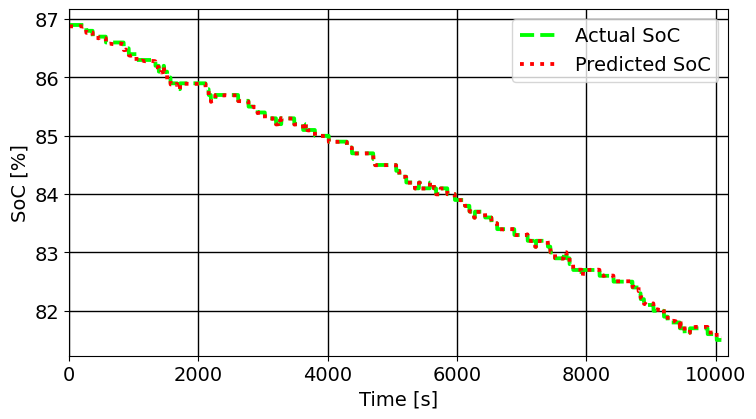

Test MSE: 0.000186.
Test R2 0.999923.


In [28]:
df_tst9 = pd.read_csv('TripA01.csv')
df_tst9 = df_tst9.fillna(method = 'bfill')
df_tst9 = df_tst9[:].loc[:,attr]
actual_soc9 = df_tst9.loc[:,"SoC [%]"].values
act_soc9 = df_tst9.loc[:,"SoC [%]"].values

inputs = df_tst9.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc9.reshape(-1,1))
X_test9, y_test9 = split_sequence(inputs, n_steps)
X_test9 = X_test9.reshape(X_test9.shape[0], X_test9.shape[1], features)

predicted_soc9 = opt_model.predict(X_test9)
predicted_soc9 = sc2.inverse_transform(predicted_soc9)

plot_predictions(actual_soc9,predicted_soc9)
mse9 = mean_squared_error(actual_soc9[0:inputs.shape[0]-1],predicted_soc9)
print("Test MSE: {:.6f}.".format(mse9))
r2_9 = r2_score(actual_soc9[0:inputs.shape[0]-1],predicted_soc9)
print("Test R2 {:.6f}.".format(r2_9))

147/252 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\3406158509.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst10 = df_tst10.fillna(method = 'bfill')


252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step


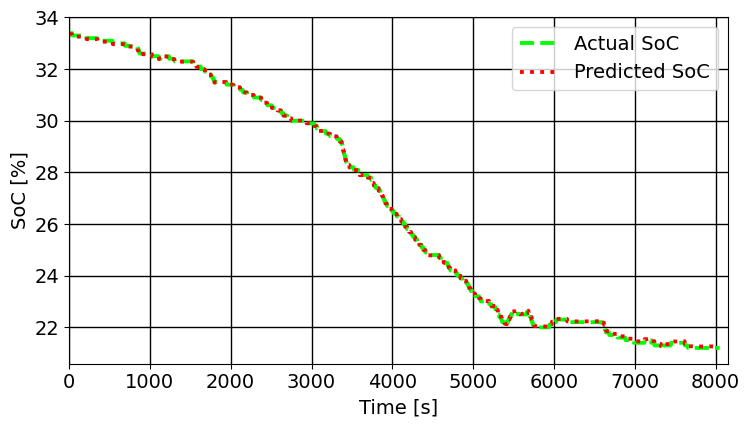

Test MSE: 0.001071.
Test R2 0.999947.


In [29]:
df_tst10 = pd.read_csv('TripB26.csv')
df_tst10 = df_tst10.fillna(method = 'bfill')
df_tst10 = df_tst10[:].loc[:,attr]
actual_soc10 = df_tst10.loc[:,"SoC [%]"].values
act_soc10 = df_tst10.loc[:,"SoC [%]"].values

inputs = df_tst10.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc10.reshape(-1,1))
X_test10, y_test10 = split_sequence(inputs, n_steps)
X_test10 = X_test10.reshape(X_test10.shape[0], X_test10.shape[1], features)

predicted_soc10 = opt_model.predict(X_test10)
predicted_soc10 = sc2.inverse_transform(predicted_soc10)

plot_predictions(actual_soc10,predicted_soc10)
mse10 = mean_squared_error(actual_soc10[0:inputs.shape[0]-1],predicted_soc10)
print("Test MSE: {:.6f}.".format(mse10))
r2_10 = r2_score(actual_soc10[0:inputs.shape[0]-1],predicted_soc10)
print("Test R2 {:.6f}.".format(r2_10))

218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_26216\1713404544.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst11 = df_tst11.fillna(method = 'bfill')


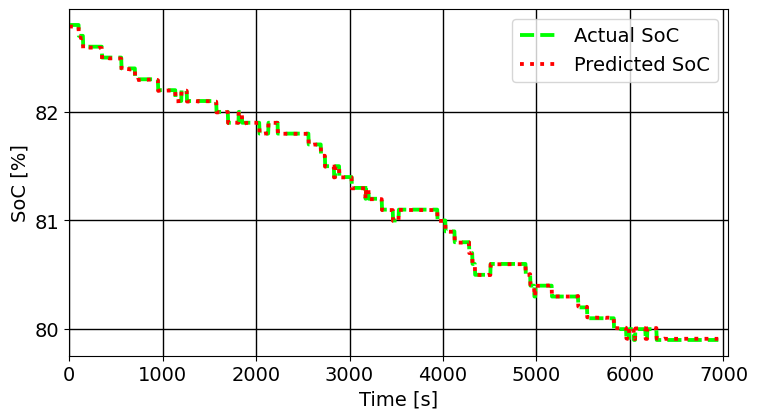

Test MSE: 0.000036.
Test R2 0.999955.


In [30]:
df_tst11 = pd.read_csv('TripA14.csv')
df_tst11 = df_tst11.fillna(method = 'bfill')
df_tst11 = df_tst11[:].loc[:,attr]
actual_soc11 = df_tst11.loc[:,"SoC [%]"].values
act_soc11 = df_tst11.loc[:,"SoC [%]"].values

inputs = df_tst11.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc11.reshape(-1,1))
X_test11, y_test11 = split_sequence(inputs, n_steps)
X_test11 = X_test11.reshape(X_test11.shape[0], X_test11.shape[1], features)

predicted_soc11 = opt_model.predict(X_test11)
predicted_soc11 = sc2.inverse_transform(predicted_soc11)

plot_predictions(actual_soc11,predicted_soc11)
mse11 = mean_squared_error(actual_soc11[0:inputs.shape[0]-1],predicted_soc11)
print("Test MSE: {:.6f}.".format(mse11))
r2_11 = r2_score(actual_soc11[0:inputs.shape[0]-1],predicted_soc11)
print("Test R2 {:.6f}.".format(r2_11))

218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_26216\1713404544.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst11 = df_tst11.fillna(method = 'bfill')


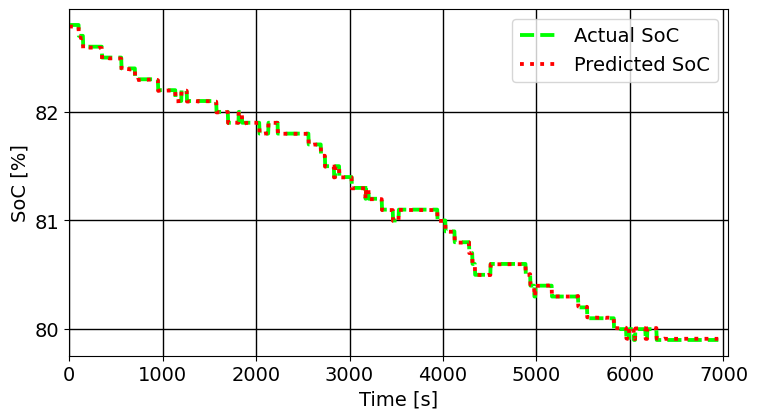

Test MSE: 0.000036.
Test R2 0.999955.


In [31]:
df_tst11 = pd.read_csv('TripA14.csv')
df_tst11 = df_tst11.fillna(method = 'bfill')
df_tst11 = df_tst11[:].loc[:,attr]
actual_soc11 = df_tst11.loc[:,"SoC [%]"].values
act_soc11 = df_tst11.loc[:,"SoC [%]"].values

inputs = df_tst11.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc11.reshape(-1,1))
X_test11, y_test11 = split_sequence(inputs, n_steps)
X_test11 = X_test11.reshape(X_test11.shape[0], X_test11.shape[1], features)

predicted_soc11 = opt_model.predict(X_test11)
predicted_soc11 = sc2.inverse_transform(predicted_soc11)

plot_predictions(actual_soc11,predicted_soc11)
mse11 = mean_squared_error(actual_soc11[0:inputs.shape[0]-1],predicted_soc11)
print("Test MSE: {:.6f}.".format(mse11))
r2_11 = r2_score(actual_soc11[0:inputs.shape[0]-1],predicted_soc11)
print("Test R2 {:.6f}.".format(r2_11))

181/423 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\2705842439.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_tst12 = df_tst12.fillna(method = 'bfill')


423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step


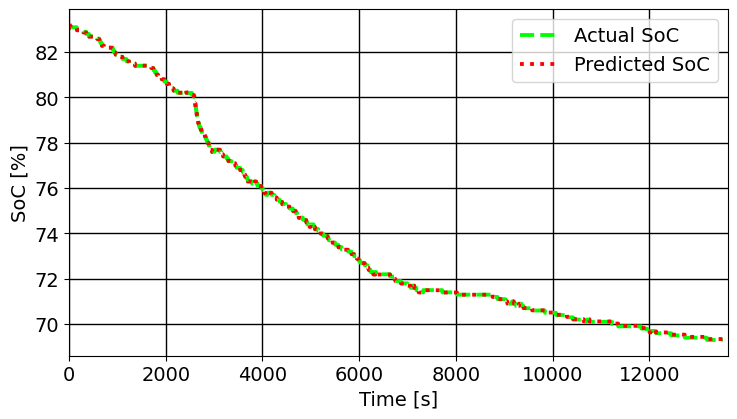

Test MSE: 0.000330.
Test R2 0.999983.


In [32]:
df_tst12 = pd.read_csv('TripB06.csv')
df_tst12 = df_tst12.fillna(method = 'bfill')
df_tst12 = df_tst12[:].loc[:,attr]
actual_soc12 = df_tst12.loc[:,"SoC [%]"].values
act_soc12 = df_tst12.loc[:,"SoC [%]"].values

inputs = df_tst12.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc12.reshape(-1,1))
X_test12, y_test12 = split_sequence(inputs, n_steps)
X_test12 = X_test12.reshape(X_test12.shape[0], X_test12.shape[1], features)

predicted_soc12 = opt_model.predict(X_test12)
predicted_soc12 = sc2.inverse_transform(predicted_soc12)

plot_predictions(actual_soc12,predicted_soc12)
mse12 = mean_squared_error(actual_soc12[0:inputs.shape[0]-1],predicted_soc12)
print("Test MSE: {:.6f}.".format(mse12))
r2_12 = r2_score(actual_soc12[0:inputs.shape[0]-1],predicted_soc12)
print("Test R2 {:.6f}.".format(r2_12))

In [33]:
from tabulate import tabulate

un_mse = [mse1,mse2,mse3,mse4,mse5,mse6,mse7,mse8,mse9,mse10,mse11,mse12]
un_r2 = [r2_1,r2_2,r2_3,r2_4,r2_5,r2_6,r2_7,r2_8,r2_9,r2_10,r2_11,r2_12]

res = []
trip_info = ["TripA09","TripA17","TripA23","TripA30","TripB02","TripB11","TripB19","TripB36","TripA01","TripB26","TripA14","TripB06"]
for i in range(len(trip_info)):
  el = []
  el.append(trip_info[i])
  el.append(round(float(un_mse[i])*100,4))
  el.append(round(float(un_r2[i])*100,4))
  res.append(el)
cols = ["Test Dataset Name","MSE","R2"]

print(tabulate(res, headers=cols, tablefmt="grid", colalign=("center", "center", "center")))

+---------------------+--------+---------+
|  Test Dataset Name  |  MSE   |   R2    |
+=====================+========+=========+
|       TripA09       | 0.0123 | 99.9962 |
+---------------------+--------+---------+
|       TripA17       | 0.0358 | 99.9965 |
+---------------------+--------+---------+
|       TripA23       | 0.0134 | 99.9941 |
+---------------------+--------+---------+
|       TripA30       | 0.0059 | 99.9967 |
+---------------------+--------+---------+
|       TripB02       | 0.0595 | 99.9967 |
+---------------------+--------+---------+
|       TripB11       | 0.0386 | 99.9953 |
+---------------------+--------+---------+
|       TripB19       | 0.0903 | 99.9965 |
+---------------------+--------+---------+
|       TripB36       | 0.2102 | 99.9974 |
+---------------------+--------+---------+
|       TripA01       | 0.0186 | 99.9923 |
+---------------------+--------+---------+
|       TripB26       | 0.1071 | 99.9947 |
+---------------------+--------+---------+
|       Tri

### Results

In [34]:
un_mse100 = [el*100 for el in un_mse]
un_r2100 = [el*100 for el in un_r2]
avgmse = round(sum(un_mse100)/len(un_mse100),4)
avgr2 = round(sum(un_r2100)/len(un_r2100),4)
print("Average MSE (in %):",avgmse)
print("Average R2 (in %):",avgr2)

Average MSE (in %): 0.0524
Average R2 (in %): 99.9958


### Miscellaneous Testing

In [35]:
usm = []
urs = []

273/428 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\3083456370.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


428/428 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step


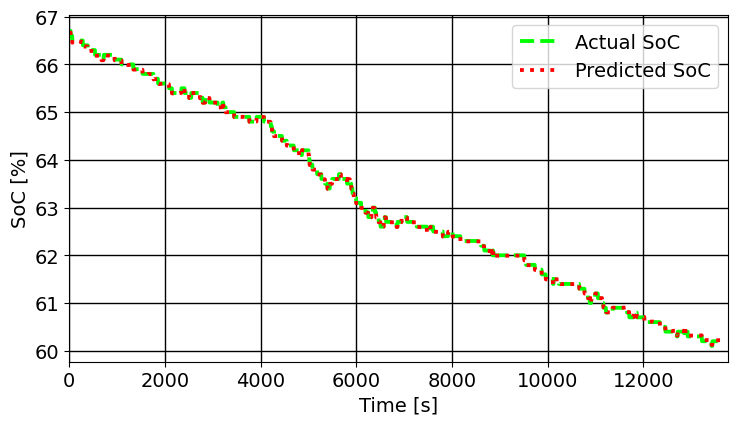

Test MSE: 0.000102.
Test R2 0.999973.


In [36]:
dft_1 = pd.read_csv('TripA05.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse4 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse4))
mis_r2_4 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_4))

270/443 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\1883886728.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step


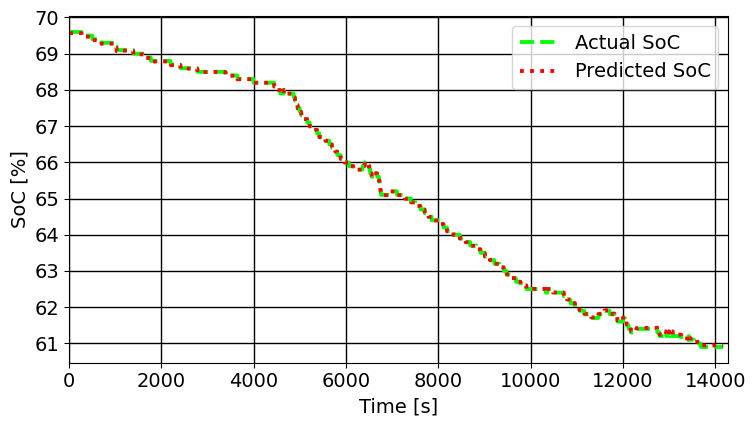

Test MSE: 0.000324.
Test R2 0.999964.


In [37]:
dft_1 = pd.read_csv('TripA10.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse6 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse6))
mis_r2_6 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_6))

176/446 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\3814902231.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step


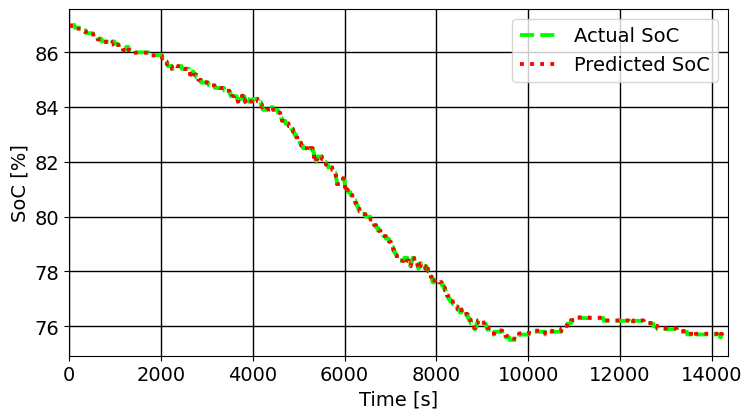

Test MSE: 0.000497.
Test R2 0.999972.


In [38]:
dft_1 = pd.read_csv('TripA11.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse7 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse7))
mis_r2_7 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_7))

154/224 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\720959683.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step


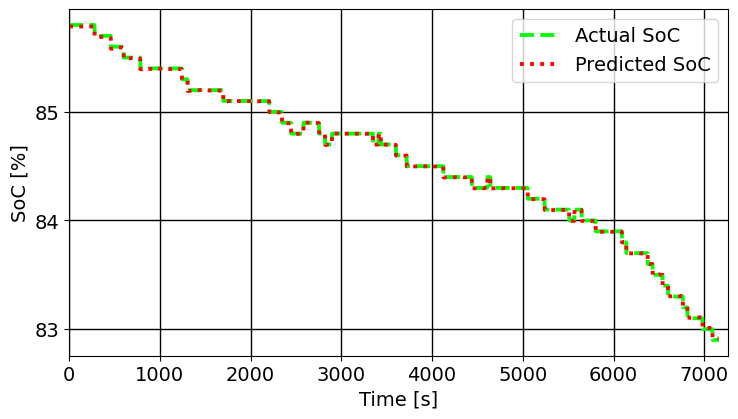

Test MSE: 0.000029.
Test R2 0.999943.


In [39]:
dft_1 = pd.read_csv('TripA13.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse8 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse8))
mis_r2_8 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_8))

170/276 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\1771605260.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step


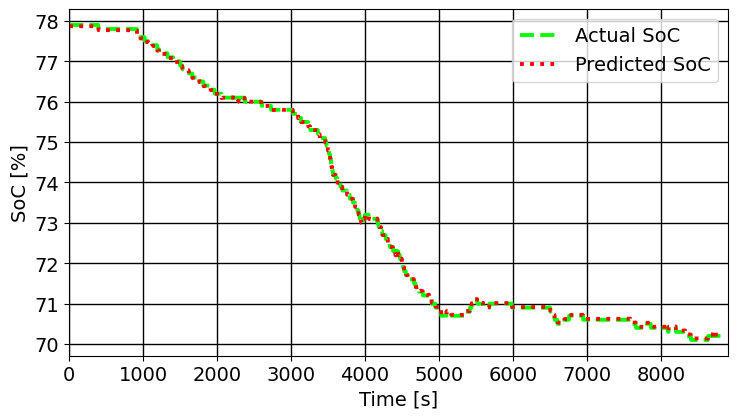

Test MSE: 0.000427.
Test R2 0.999948.


In [40]:
dft_1 = pd.read_csv('TripA18.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse11 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse11))
mis_r2_11 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_11))

247/497 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\3702527778.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


497/497 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step


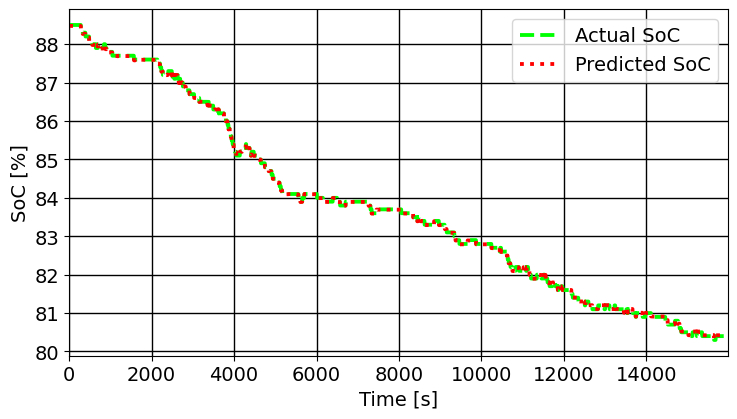

Test MSE: 0.000121.
Test R2 0.999979.


In [41]:
dft_1 = pd.read_csv('TripA19.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse12 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse12))
mis_r2_12 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_12))

190/575 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\3802988045.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


575/575 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step


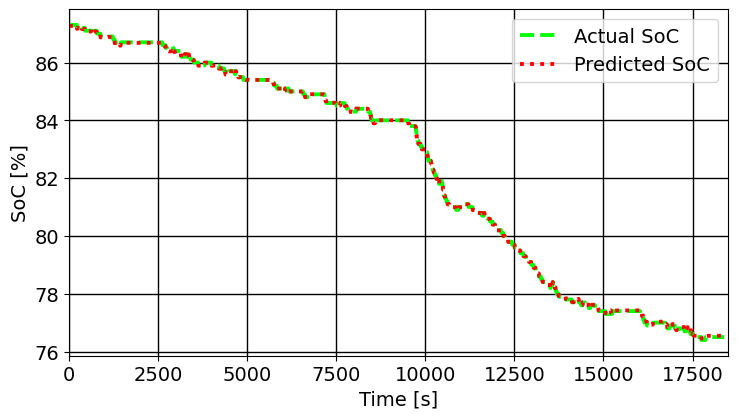

Test MSE: 0.000407.
Test R2 0.999971.


In [42]:
dft_1 = pd.read_csv('TripA22.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse14 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse14))
mis_r2_14 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_14))

273/504 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\3139477592.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step


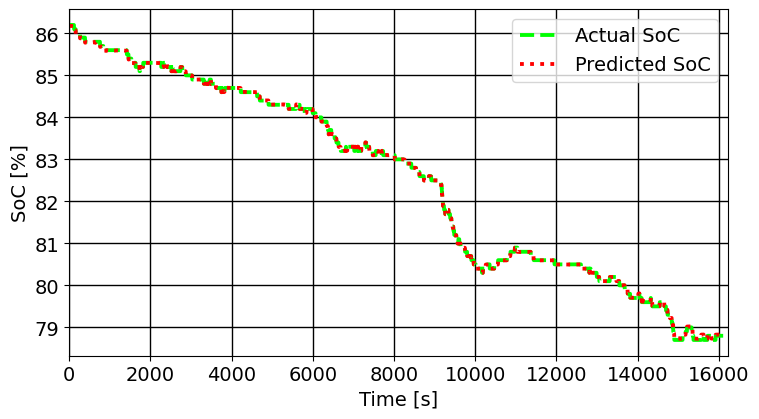

Test MSE: 0.000124.
Test R2 0.999977.


In [43]:
dft_1 = pd.read_csv('TripA26.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse16 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse16))
mis_r2_16 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_16))

176/419 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\4078843543.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step


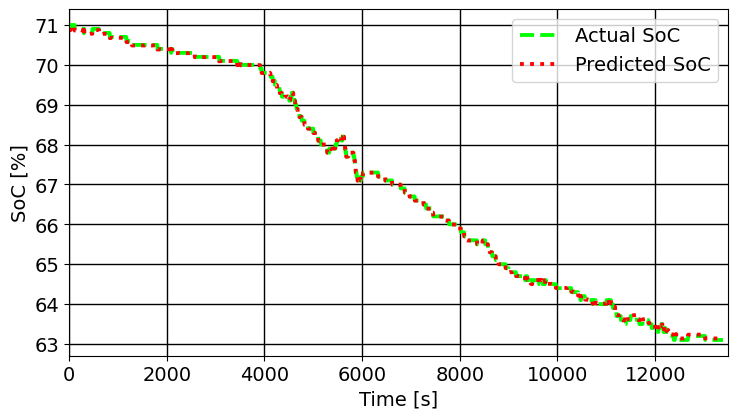

Test MSE: 0.000296.
Test R2 0.999961.


In [44]:
dft_1 = pd.read_csv('TripA29.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse18 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse18))
mis_r2_18 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_18))

180/371 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\3244251458.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step


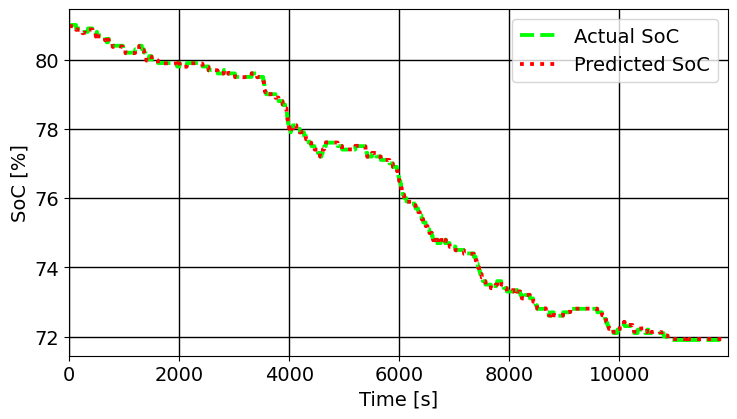

Test MSE: 0.000278.
Test R2 0.999973.


In [45]:
dft_1 = pd.read_csv('TripA31.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse19 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse19))
mis_r2_19 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_19))

In [46]:
usm1 = []
urs1 = []
usm1 = [mis_mse4,mis_mse6,mis_mse7,mis_mse8,mis_mse11,mis_mse12,mis_mse14,mis_mse16,mis_mse18,mis_mse19]
urs1 = [mis_r2_4,mis_r2_6,mis_r2_7,mis_r2_8,mis_r2_11,mis_r2_12,mis_r2_14,mis_r2_16,mis_r2_18,mis_r2_19]

In [47]:
usm2 = []
urs2 = []

259/924 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\4117885866.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


924/924 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step


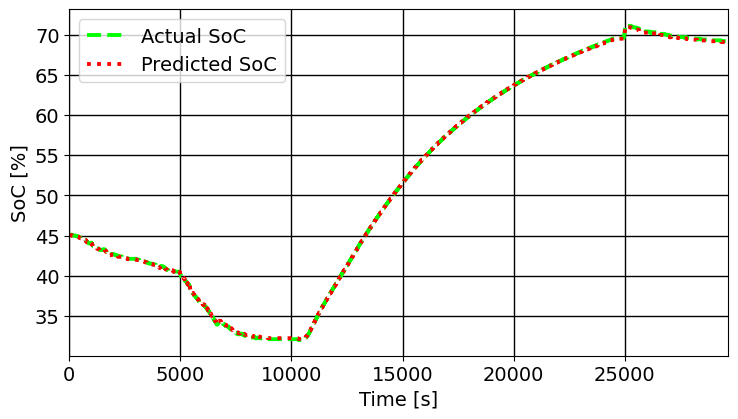

Test MSE: 0.006995.
Test R2 0.999964.


In [48]:
dft_1 = pd.read_csv('TripB04.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

167/911 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\3610025232.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


911/911 ━━━━━━━━━━━━━━━━━━━━ 1s 606us/step


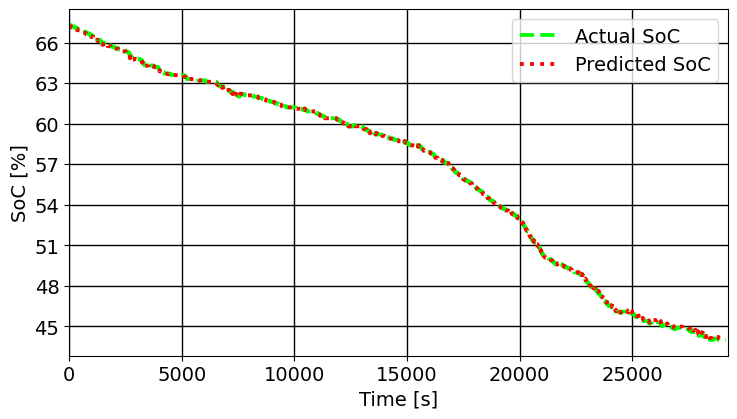

Test MSE: 0.002804.
Test R2 0.999946.


In [49]:
dft_1 = pd.read_csv('TripB08.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

1271/1271 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step


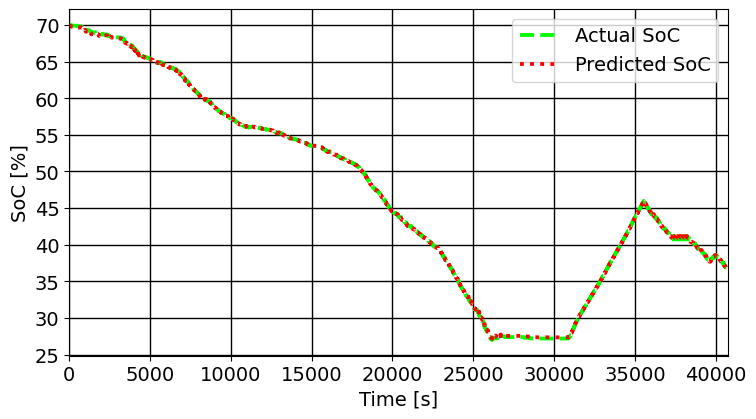

Test MSE: 0.007360.
Test R2 0.999959.


In [50]:
dft_1 = pd.read_csv('TripB09.csv')
dft_1 = dft_1[:].loc[:,attr]
dft_1 = dft_1.dropna()
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

 150/1008 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\4232011739.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step


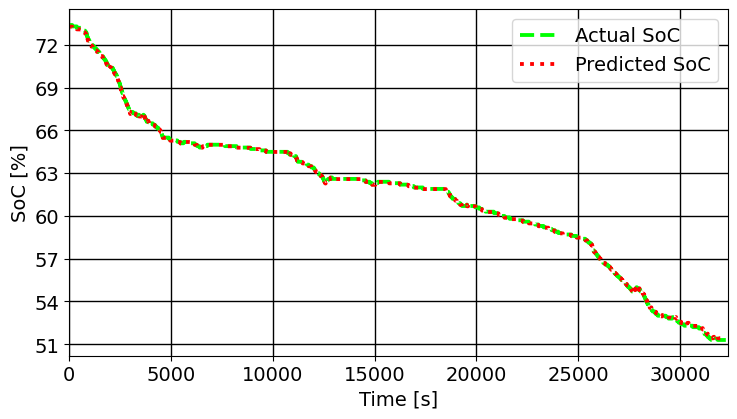

Test MSE: 0.002181.
Test R2 0.999919.


In [51]:
dft_1 = pd.read_csv('TripB12.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

 179/1195 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\539066025.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


1195/1195 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step


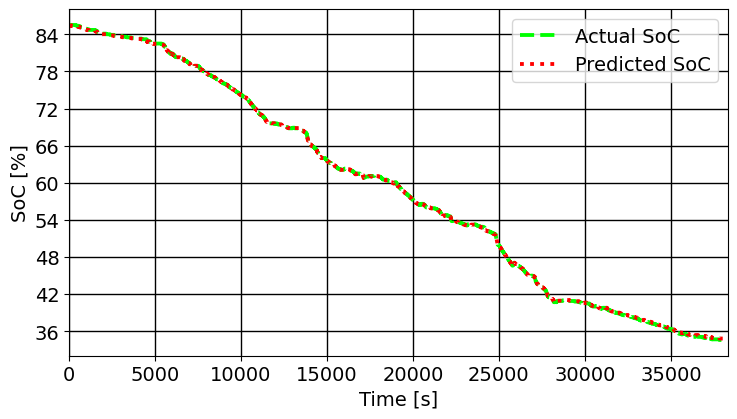

Test MSE: 0.008916.
Test R2 0.999969.


In [52]:
dft_1 = pd.read_csv('TripB14.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

260/488 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\2333007882.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step


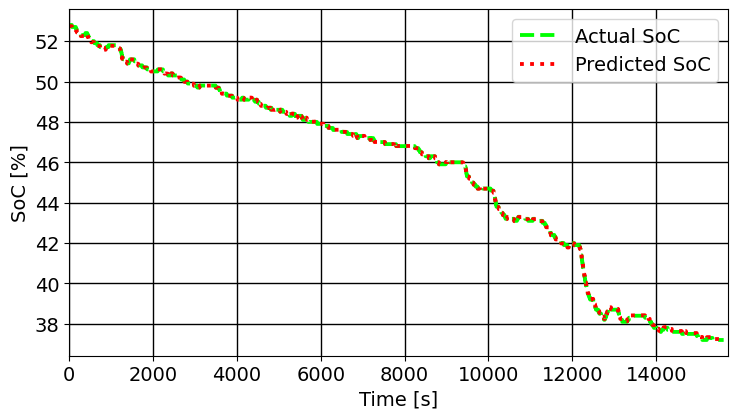

Test MSE: 0.000642.
Test R2 0.999971.


In [53]:
dft_1 = pd.read_csv('TripB17.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

175/347 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\2033045557.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step


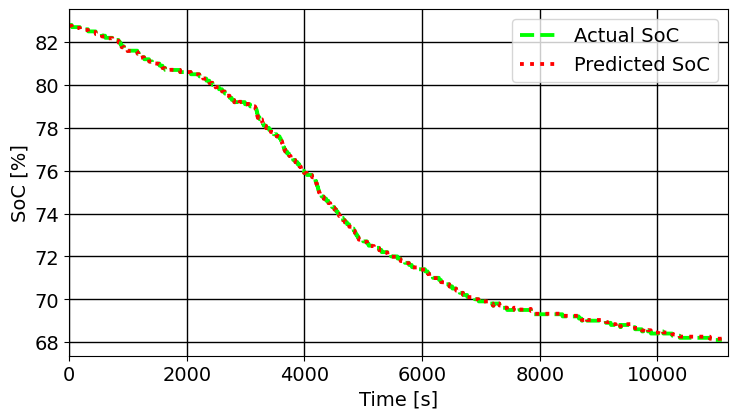

Test MSE: 0.000718.
Test R2 0.999973.


In [54]:
dft_1 = pd.read_csv('TripB18.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

186/325 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\3096730324.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


325/325 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step


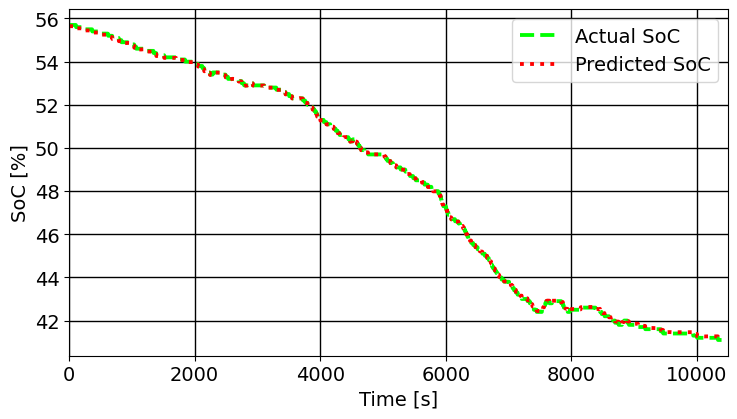

Test MSE: 0.001231.
Test R2 0.999953.


In [55]:
dft_1 = pd.read_csv('TripB21.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

265/306 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\2725902585.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step


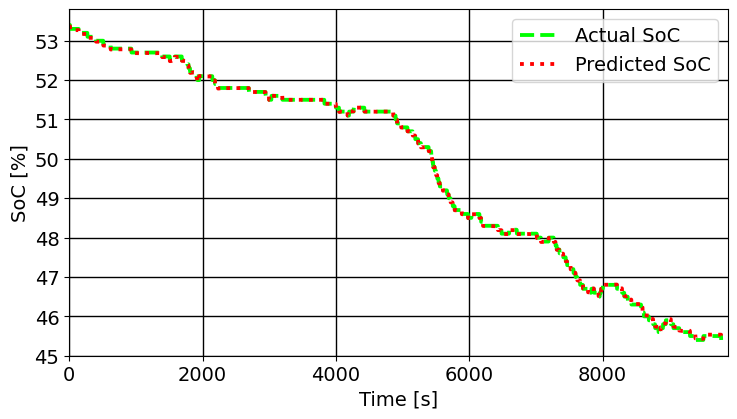

Test MSE: 0.000258.
Test R2 0.999960.


In [56]:
dft_1 = pd.read_csv('TripB24.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

254/303 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\3732686610.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step


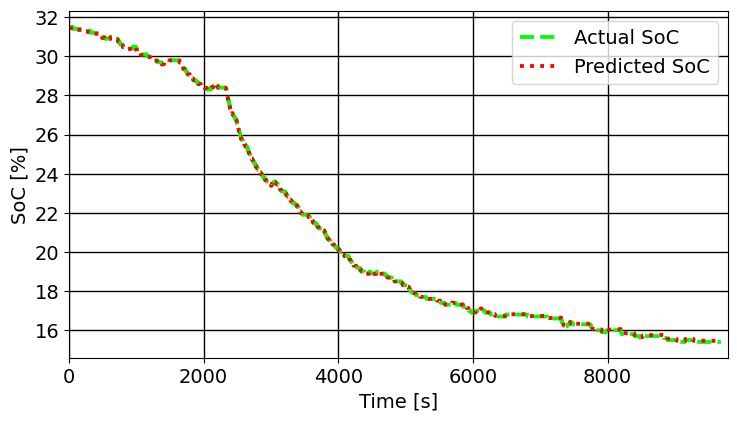

Test MSE: 0.001219.
Test R2 0.999962.


In [57]:
dft_1 = pd.read_csv('TripB29.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_26216\2455074966.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


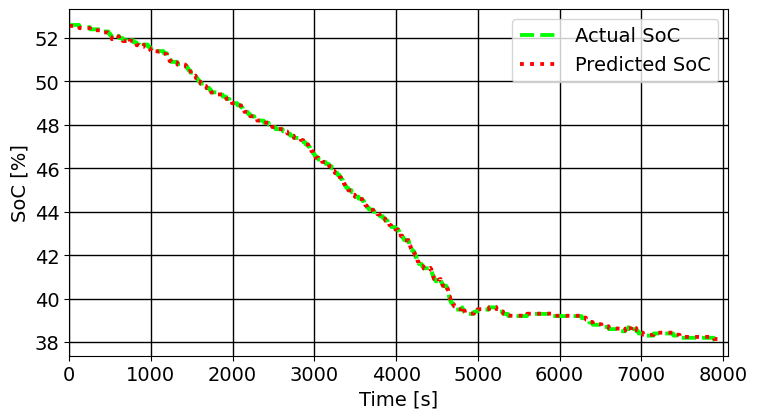

Test MSE: 0.000788.
Test R2 0.999971.


In [58]:
dft_1 = pd.read_csv('TripB32.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step


C:\Users\moule\AppData\Local\Temp\ipykernel_26216\1184243548.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


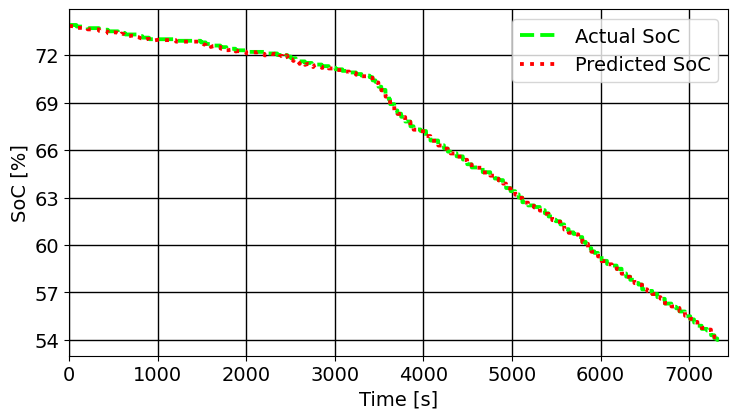

Test MSE: 0.002907.
Test R2 0.999926.


In [59]:
dft_1 = pd.read_csv('TripB34.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

271/426 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step

C:\Users\moule\AppData\Local\Temp\ipykernel_26216\3389318454.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dft1 = dft1.fillna(method = 'bfill')


426/426 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step


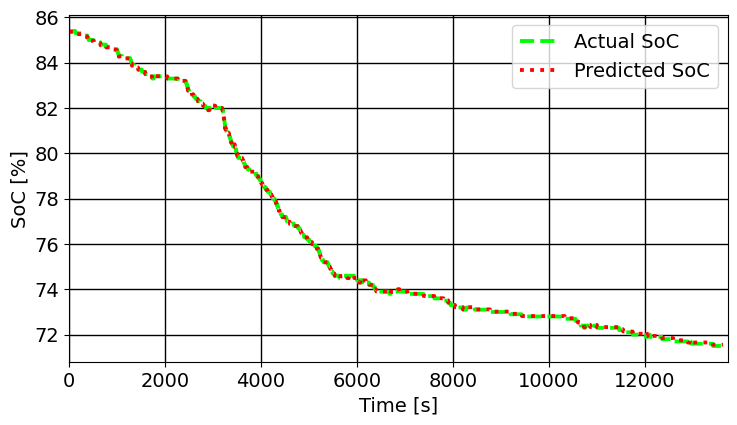

Test MSE: 0.000645.
Test R2 0.999970.


In [60]:
dft_1 = pd.read_csv('TripB35.csv')
dft1 = dft1.fillna(method = 'bfill')
dft_1 = dft_1[:].loc[:,attr]
actual_soc1 = dft_1.loc[:,"SoC [%]"].values
act_soc1 = dft_1.loc[:,"SoC [%]"].values

inputs = dft_1.values

sc1 = MinMaxScaler(feature_range=(-1, 1))
sc2 = MinMaxScaler(feature_range=(-1, 1))
inputs = sc1.fit_transform(inputs)
output = sc2.fit_transform(act_soc1.reshape(-1,1))
X_test1, y_test1 = split_sequence(inputs, n_steps)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], features)

predicted_soc1 = opt_model.predict(X_test1)
predicted_soc1 = sc2.inverse_transform(predicted_soc1)

plot_predictions(actual_soc1,predicted_soc1)
mis_mse1 = mean_squared_error(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test MSE: {:.6f}.".format(mis_mse1))
mis_r2_1 = r2_score(actual_soc1[0:inputs.shape[0]-1],predicted_soc1)
print("Test R2 {:.6f}.".format(mis_r2_1))
usm2.append(mis_mse1)
urs2.append(mis_r2_1)

In [61]:
usm = [y for x in [usm1, usm2] for y in x]
urs = [y for x in [urs1, urs2] for y in x]

In [62]:
from tabulate import tabulate

res = []
trip_info = ["TripA05","TripA10","TripA11","TripA13","TripA18","TripA19","TripA22","TripA26","TripA29","TripA31",
             "TripB04","TripB08","TripB09","TripB12","TripB14","TripB17","TripB18","TripB21","TripB24","TripB29","TripB32","TripB34",
             "TripB35"]
for i in range(len(trip_info)):
  el = []
  el.append(trip_info[i])
  el.append(round(usm[i]*100,4))
  el.append(round(urs[i]*100,4))
  res.append(el)
cols = ["Test Dataset Name","MSE","R2"]

print(tabulate(res, headers=cols, tablefmt="grid", colalign=("center", "center", "center")))

+---------------------+--------+---------+
|  Test Dataset Name  |  MSE   |   R2    |
+=====================+========+=========+
|       TripA05       | 0.0102 | 99.9973 |
+---------------------+--------+---------+
|       TripA10       | 0.0324 | 99.9964 |
+---------------------+--------+---------+
|       TripA11       | 0.0497 | 99.9972 |
+---------------------+--------+---------+
|       TripA13       | 0.0029 | 99.9943 |
+---------------------+--------+---------+
|       TripA18       | 0.0427 | 99.9948 |
+---------------------+--------+---------+
|       TripA19       | 0.0121 | 99.9979 |
+---------------------+--------+---------+
|       TripA22       | 0.0407 | 99.9971 |
+---------------------+--------+---------+
|       TripA26       | 0.0124 | 99.9977 |
+---------------------+--------+---------+
|       TripA29       | 0.0296 | 99.9961 |
+---------------------+--------+---------+
|       TripA31       | 0.0278 | 99.9973 |
+---------------------+--------+---------+
|       Tri

### Results

In [64]:
usm100 = [el*100 for el in usm]
urs100 = [el*100 for el in urs]
avgmse = round(sum(usm100)/len(usm100),4)
avgr2 = round(sum(urs100)/len(urs100),4)
print("Average MSE (in %):",avgmse)
print("Average R2 (in %):",avgr2)

Average MSE (in %): 0.1707
Average R2 (in %): 99.9961


***